In [0]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import folium

In [0]:
url = 'https://raw.githubusercontent.com/Josefbautista94/GitHub/master/NYPD_Shooting_Incident_Data__Year_To_Date_.csv'
data = pd.read_csv(url)
data.head(21)



,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
0,203083804,09/30/2019,13:49:00,MANHATTAN,23,2.0,MULTI DWELL - PUBLIC HOUS,False,18-24,M,BLACK,18-24,M,BLACK,998869,230618,40.799665,-73.947200
1,203083804,09/30/2019,13:49:00,MANHATTAN,23,2.0,MULTI DWELL - PUBLIC HOUS,True,18-24,M,BLACK,18-24,M,BLACK,998869,230618,40.799665,-73.947200
2,203041425,09/29/2019,23:15:00,BRONX,52,0.0,NaN,False,25-44,M,WHITE HISPANIC,18-24,M,BLACK HISPANIC,1010668,253614,40.862755,-73.904493
3,203041429,09/29/2019,18:30:00,STATEN ISLAND,120,0.0,NaN,False,NaN,NaN,NaN,<18,M,BLACK,962585,165738,40.621571,-74.078043
4,203041424,09/29/2019,00:35:00,BRONX,47,2.0,MULTI DWELL - PUBLIC HOUS,True,25-44,M,BLACK,25-44,M,WHITE,1026855,262287,40.886497,-73.845917
5,203041430,09/28/2019,01:17:00,BRONX,42,0.0,NaN,True,NaN,NaN,NaN,18-24,M,BLACK,1012860,244801,40.838559,-73.896606
6,203042901,09/27/2019,23:29:00,BROOKLYN,75,2.0,MULTI DWELL - PUBLIC HOUS,False,NaN,NaN,NaN,45-64,M,BLACK,1019084,183993,40.671635,-73.874428
7,203041427,09/27/2019,21:45:00,QUEENS,101,0.0,NaN,False,18-24,M,BLACK,25-44,F,BLACK,1051162,155661,40.593685,-73.759070
8,203041423,09/27/2019,20:40:00,BROOKLYN,75,2.0,MULTI DWELL - PUBLIC HOUS,False,NaN,NaN,NaN,25-44,F,BLACK,1013031,182526,40.667630,-73.896254
9,203041423,09/27/2019,20:40:00,BROOKLYN,75,2.0,MULTI DWELL - PUBLIC HOUS,False,NaN,NaN,NaN,18-24,M,BLACK,1013031,182526,40.667630,-73.896254


In [0]:
data1 =data.dropna(subset = ['INCIDENT_KEY','OCCUR_DATE','OCCUR_TIME','BORO','PRECINCT','JURISDICTION_CODE','LOCATION_DESC','STATISTICAL_MURDER_FLAG','PERP_AGE_GROUP','PERP_SEX','PERP_RACE','VIC_AGE_GROUP','VIC_SEX','VIC_RACE','X_COORD_CD','Y_COORD_CD','Latitude','Longitude'])
data1.head(100)

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
0,203083804,09/30/2019,13:49:00,MANHATTAN,23,2.0,MULTI DWELL - PUBLIC HOUS,False,18-24,M,BLACK,18-24,M,BLACK,998869,230618,40.799665,-73.947200
1,203083804,09/30/2019,13:49:00,MANHATTAN,23,2.0,MULTI DWELL - PUBLIC HOUS,True,18-24,M,BLACK,18-24,M,BLACK,998869,230618,40.799665,-73.947200
4,203041424,09/29/2019,00:35:00,BRONX,47,2.0,MULTI DWELL - PUBLIC HOUS,True,25-44,M,BLACK,25-44,M,WHITE,1026855,262287,40.886497,-73.845917
17,202944932,09/26/2019,02:30:00,BRONX,40,2.0,MULTI DWELL - PUBLIC HOUS,False,25-44,F,BLACK HISPANIC,25-44,M,BLACK,1005170,235308,40.812525,-73.924427
21,202853371,09/24/2019,17:45:00,BROOKLYN,73,2.0,MULTI DWELL - PUBLIC HOUS,False,18-24,M,BLACK,18-24,M,BLACK,1006117,183402,40.670054,-73.921175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,196630584,04/30/2019,18:29:00,MANHATTAN,25,2.0,MULTI DWELL - PUBLIC HOUS,False,25-44,U,BLACK,18-24,M,BLACK,1002228,234677,40.810800,-73.935057
499,196525187,04/27/2019,11:36:00,BRONX,48,0.0,MULTI DWELL - APT BUILD,True,25-44,M,BLACK,18-24,M,BLACK HISPANIC,1013952,247178,40.845080,-73.892649
507,196315234,04/22/2019,17:20:00,BROOKLYN,81,0.0,MULTI DWELL - APT BUILD,False,65+,M,BLACK,45-64,M,BLACK,1006938,187372,40.680949,-73.918202
510,196276904,04/20/2019,01:19:00,BROOKLYN,84,2.0,MULTI DWELL - PUBLIC HOUS,False,25-44,M,BLACK,25-44,M,BLACK,988740,194815,40.701406,-73.983808


In [0]:
# Look at statistics of numerical features
data.describe()

,INCIDENT_KEY,PRECINCT,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
count,7.490000e+02,749.000000,748.000000,7.490000e+02,749.000000,749.000000,749.000000
mean,1.980070e+08,65.907877,0.430481,1.010338e+06,208237.809079,40.738192,-73.905857
std,3.162255e+06,28.495253,0.819267,1.795087e+04,31100.912145,0.085373,0.064725
min,1.917100e+08,1.000000,0.000000,9.367220e+05,148311.000000,40.573763,-74.171252
25%,1.953973e+08,43.000000,0.000000,1.000486e+06,183148.000000,40.669310,-73.941409
50%,1.982555e+08,69.000000,0.000000,1.008224e+06,195411.000000,40.702846,-73.913563
75%,2.006683e+08,81.000000,0.000000,1.017307e+06,238673.000000,40.821736,-73.880844
max,2.030838e+08,122.000000,2.000000,1.058211e+06,263946.000000,40.891040,-73.733248


In [0]:

data1['LOCATION_DESC'] = data1['LOCATION_DESC'].astype('|S')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
data1['BORO'] = data1['BORO'].astype('|S')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
data1['OCCUR_DATE'] = pd.to_datetime(data1['OCCUR_DATE'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
data1['OCCUR_TIME'] = pd.to_datetime(data1['OCCUR_TIME'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
#types of the columns 
types = data1.dtypes

print(types)

INCIDENT_KEY                        int64
OCCUR_DATE                 datetime64[ns]
OCCUR_TIME                 datetime64[ns]
BORO                               object
PRECINCT                            int64
JURISDICTION_CODE                 float64
LOCATION_DESC                      object
STATISTICAL_MURDER_FLAG              bool
PERP_AGE_GROUP                     object
PERP_SEX                           object
PERP_RACE                          object
VIC_AGE_GROUP                      object
VIC_SEX                            object
VIC_RACE                           object
X_COORD_CD                          int64
Y_COORD_CD                          int64
Latitude                          float64
Longitude                         float64
dtype: object


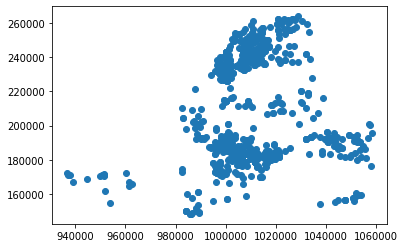

In [0]:
plt.scatter(data['X_COORD_CD'], data['Y_COORD_CD'])

(40.6, 40.9)

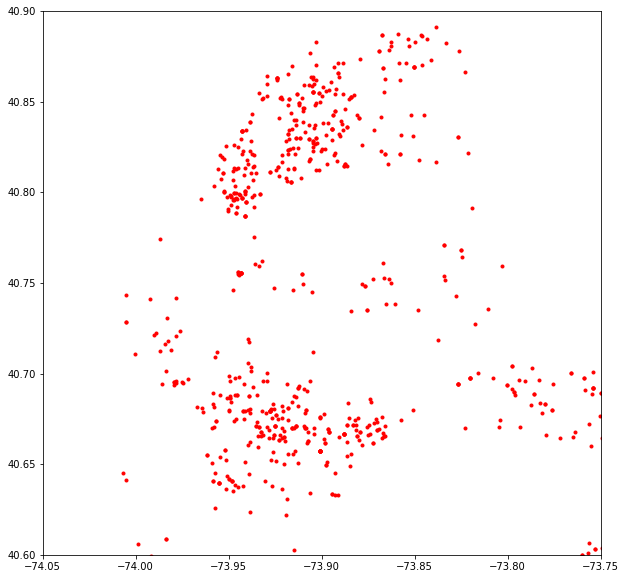

In [0]:
#Highlighted areas are area with crimes
plt.figure(figsize=(10, 10))
plt.plot(data['Longitude'], data['Latitude'],
         
         'r.',
         alpha=1.)
plt.xlim(-74.05, -73.75)
plt.ylim(40.6, 40.9) 

In [0]:
def generateBaseMap(default_location=[40.693943, -73.985880], default_zoom_start=10):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [0]:
base_map =generateBaseMap()

In [0]:
from folium.plugins import HeatMap
base_map = generateBaseMap()
HeatMap(data[['Latitude', 'Longitude']].groupby(['Latitude', 'Longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map)

In [0]:
#Highlighted areas are area with crimes
base_map

In [0]:
 #This is stating if a murder occured or not during an incident 
 data['STATISTICAL_MURDER_FLAG'].value_counts()

False    612
True     137
Name: STATISTICAL_MURDER_FLAG, dtype: int64

In [0]:
#This is a list of the most reported incidents in a day
 data['OCCUR_DATE'].value_counts()


07/05/2019    15
09/02/2019    14
05/26/2019    14
07/27/2019    13
08/11/2019    10
              ..
02/05/2019     1
03/25/2019     1
02/01/2019     1
09/08/2019     1
07/02/2019     1
Name: OCCUR_DATE, Length: 231, dtype: int64

In [0]:
#This is a list of places where incidents took place in the most
data['LOCATION_DESC'].value_counts()

MULTI DWELL - PUBLIC HOUS    154
MULTI DWELL - APT BUILD       37
PVT HOUSE                     20
GROCERY/BODEGA                19
BAR/NIGHT CLUB                 6
GAS STATION                    2
HOSPITAL                       2
RESTAURANT/DINER               1
DRUG STORE                     1
FAST FOOD                      1
LIQUOR STORE                   1
SOCIAL CLUB/POLICY LOCATI      1
Name: LOCATION_DESC, dtype: int64

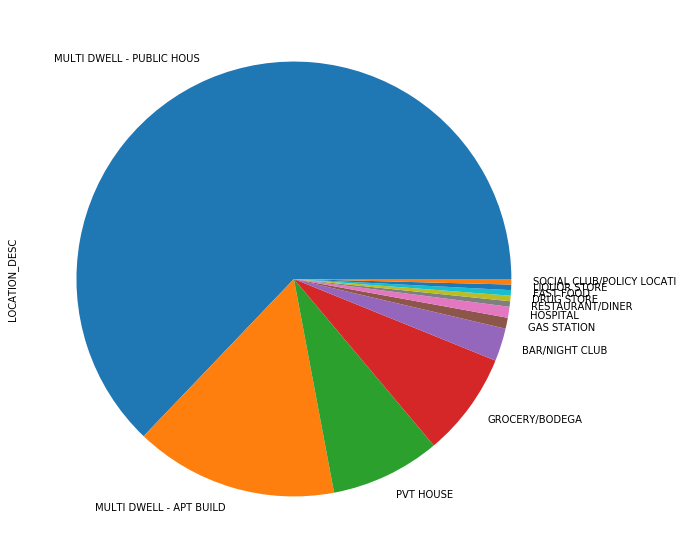

In [0]:
#List of places where incidents occured on pie graph
data['LOCATION_DESC'].value_counts().plot.pie(figsize=(10, 10))

In [0]:
#Race of victims
data['VIC_RACE'].value_counts()

BLACK                       513
WHITE HISPANIC              133
BLACK HISPANIC               57
WHITE                        18
UNKNOWN                      14
ASIAN / PACIFIC ISLANDER     14
Name: VIC_RACE, dtype: int64

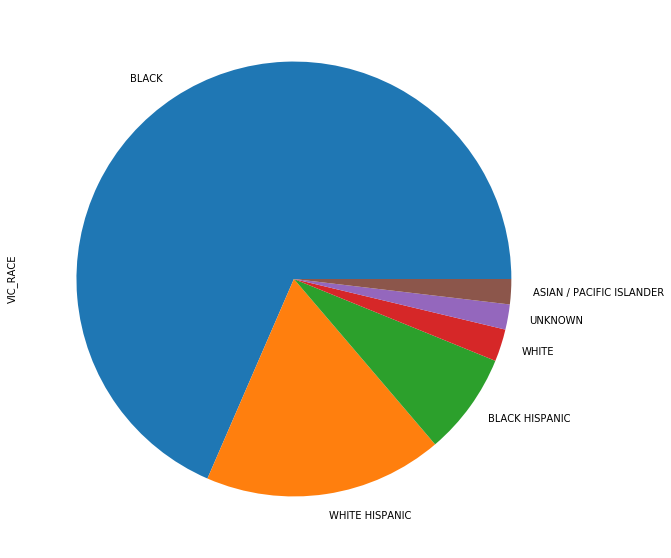

In [0]:
#Race of victims on pie graph
data['VIC_RACE'].value_counts().plot.pie(figsize=(10, 10))

In [0]:
#Numbers of victims per age group
data['VIC_AGE_GROUP'].value_counts()

25-44      403
18-24      202
45-64       79
<18         54
UNKNOWN      7
65+          4
Name: VIC_AGE_GROUP, dtype: int64

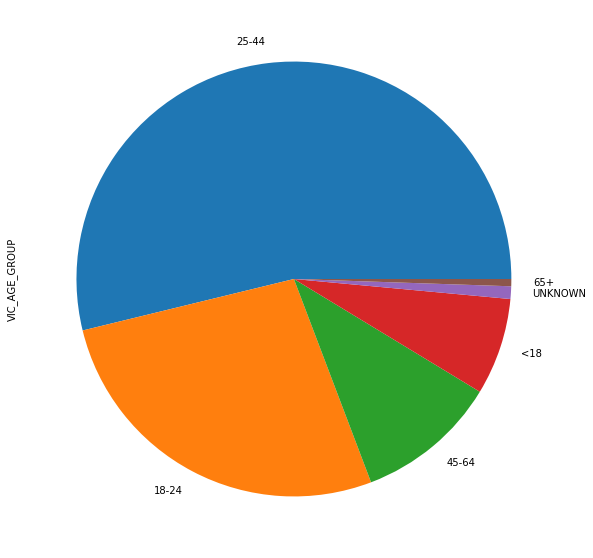

In [0]:
#Victims age group on pie chart
#Highest amount of vicitims tend to be between 25-44
#followed by 18-24 and then follwed by people below the age of 18
#the rest are the elderly and unknown 
data['VIC_AGE_GROUP'].value_counts().plot.pie(figsize=(10, 10))

In [0]:
# Most of the vitims were male with a significant 
# amount Females according to the graph
data['VIC_SEX'].value_counts()

M    674
F     74
U      1
Name: VIC_SEX, dtype: int64

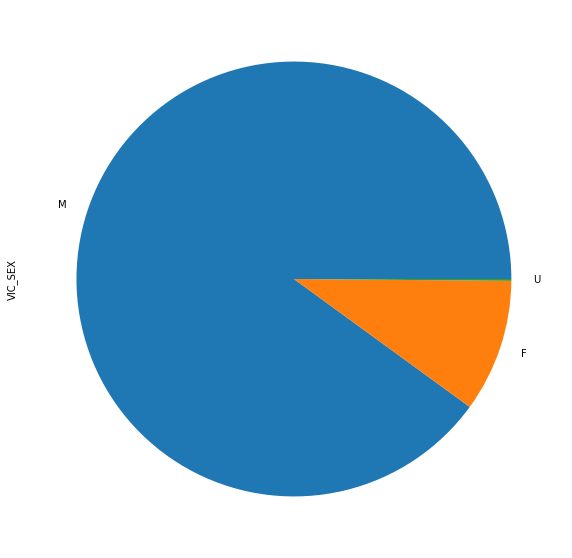

In [0]:
data['VIC_SEX'].value_counts().plot.pie(figsize=(10, 10))

In [0]:
#Perpitrators race
data['PERP_RACE'].value_counts()

BLACK                       268
WHITE HISPANIC               57
UNKNOWN                      28
BLACK HISPANIC               21
WHITE                        10
ASIAN / PACIFIC ISLANDER      4
Name: PERP_RACE, dtype: int64

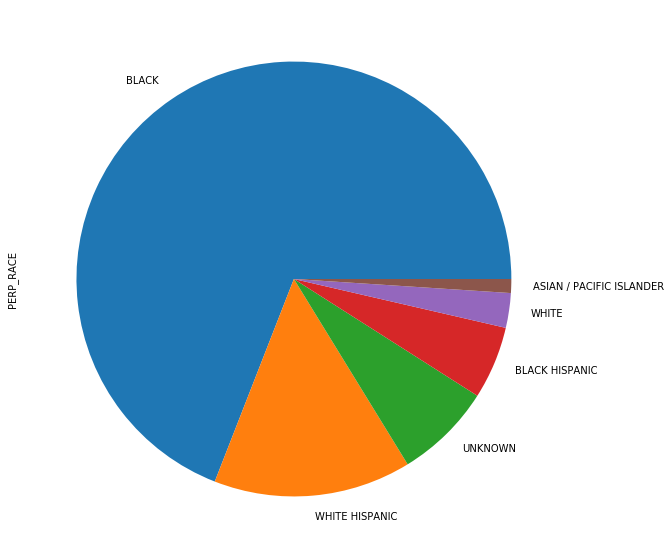

In [0]:
#Race of perpitrators 
data['PERP_RACE'].value_counts().plot.pie(figsize=(10, 10))

In [0]:
#Age group of perpitrators race
data['PERP_AGE_GROUP'].value_counts()

25-44      169
18-24      147
<18         41
45-64       18
UNKNOWN     10
65+          3
Name: PERP_AGE_GROUP, dtype: int64

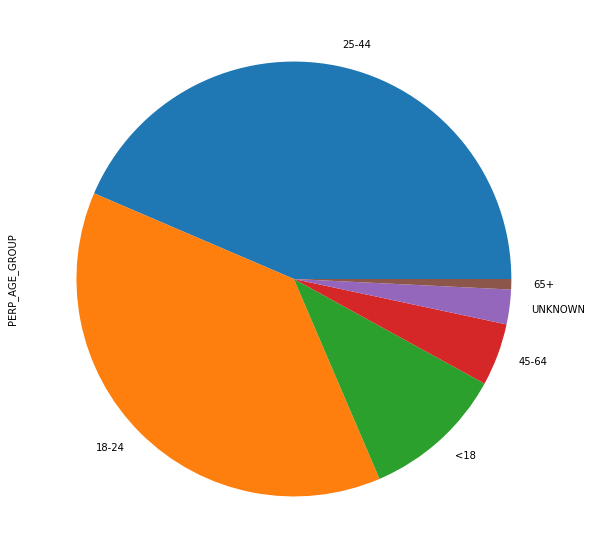

In [0]:
#Age group of perpitrators
#according to the graph below the highest amount of the perpitrators tend to be 
#between ages tha range from 25-44 followed by 18-24, and below 18 follows third
data['PERP_AGE_GROUP'].value_counts().plot.pie(figsize=(10, 10))

In [0]:
#Most of the perpitrators were idendtified as male
data['PERP_SEX'].value_counts()

M    371
U     11
F      6
Name: PERP_SEX, dtype: int64

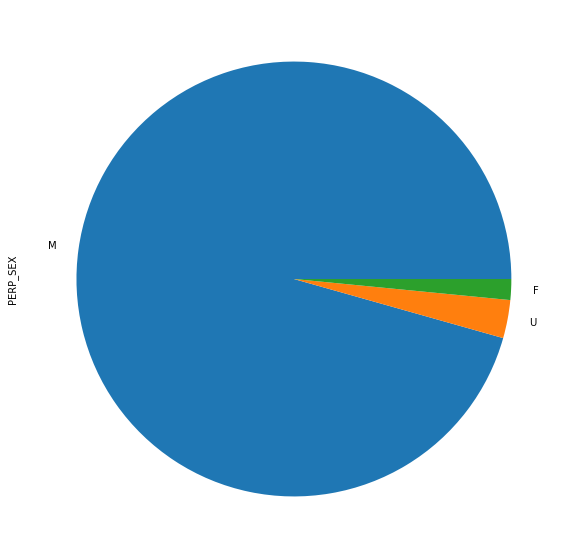

In [0]:
data['PERP_SEX'].value_counts().plot.pie(figsize=(10, 10))

In [0]:
#converting datatypes to categorical correlating them
data['LOCATION_DESC']=data['LOCATION_DESC'].astype('category').cat.codes
data['PERP_RACE']=data['PERP_RACE'].astype('category').cat.codes
data.corr()

,INCIDENT_KEY,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
INCIDENT_KEY,1.000000,-0.007830,-0.037017,-0.030657,-0.011528,-0.021096,-0.004843,-0.035188,-0.035181,-0.004974
PRECINCT,-0.007830,1.000000,-0.126873,-0.100699,0.014629,-0.011339,0.290313,-0.607878,-0.608212,0.289368
JURISDICTION_CODE,-0.037017,-0.126873,1.000000,0.777354,0.012767,-0.027180,-0.113951,0.089119,0.089230,-0.113908
LOCATION_DESC,-0.030657,-0.100699,0.777354,1.000000,0.051519,-0.004658,-0.099569,0.049584,0.049695,-0.099553
STATISTICAL_MURDER_FLAG,-0.011528,0.014629,0.012767,0.051519,1.000000,-0.010623,0.039657,0.003174,0.003159,0.039677
PERP_RACE,-0.021096,-0.011339,-0.027180,-0.004658,-0.010623,1.000000,0.007411,0.153796,0.153774,0.007765
X_COORD_CD,-0.004843,0.290313,-0.113951,-0.099569,0.039657,0.007411,1.000000,0.070616,0.069992,0.999998
Y_COORD_CD,-0.035188,-0.607878,0.089119,0.049584,0.003174,0.153796,0.070616,1.000000,1.000000,0.072481
Latitude,-0.035181,-0.608212,0.089230,0.049695,0.003159,0.153774,0.069992,1.000000,1.000000,0.071857
Longitude,-0.004974,0.289368,-0.113908,-0.099553,0.039677,0.007765,0.999998,0.072481,0.071857,1.000000


In [0]:
#numbers indicate how many incidents were reported by boro
#most incidents occured in Brooklyn followed by the bronx  then Queens
data['BORO'].value_counts()

BROOKLYN         288
BRONX            199
QUEENS           131
MANHATTAN        115
STATEN ISLAND     16
Name: BORO, dtype: int64

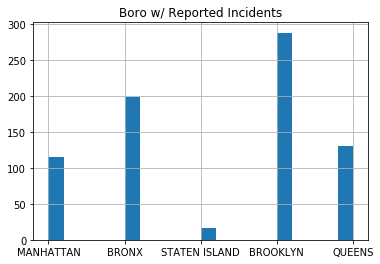

In [0]:
#Data showing places with the highest crime rates
plt.title("Boro w/ Reported Incidents")
data['BORO'].hist(bins=20)


In [0]:
#This right here shows the time that the incidents occur the most in the day 10:53pm came up 11 times?
data = data.dropna(subset=['OCCUR_TIME'])

data['OCCUR_TIME'].value_counts().max()

11

In [0]:
#identifying the max 
data['OCCUR_TIME'].value_counts().idxmax()

'22:53:00'

In [0]:
#stringDate =data['OCCUR_TIME'].astype(str).tolist()
#stringLoc = data['LOCATION_DESC'].astype(str).tolist()
#stringDate 

In [0]:
data1.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
0,203083804,09/30/2019,13:49:00,MANHATTAN,23,2.0,MULTI DWELL - PUBLIC HOUS,False,18-24,M,BLACK,18-24,M,BLACK,998869,230618,40.799665,-73.947200
1,203083804,09/30/2019,13:49:00,MANHATTAN,23,2.0,MULTI DWELL - PUBLIC HOUS,True,18-24,M,BLACK,18-24,M,BLACK,998869,230618,40.799665,-73.947200
4,203041424,09/29/2019,00:35:00,BRONX,47,2.0,MULTI DWELL - PUBLIC HOUS,True,25-44,M,BLACK,25-44,M,WHITE,1026855,262287,40.886497,-73.845917
17,202944932,09/26/2019,02:30:00,BRONX,40,2.0,MULTI DWELL - PUBLIC HOUS,False,25-44,F,BLACK HISPANIC,25-44,M,BLACK,1005170,235308,40.812525,-73.924427
21,202853371,09/24/2019,17:45:00,BROOKLYN,73,2.0,MULTI DWELL - PUBLIC HOUS,False,18-24,M,BLACK,18-24,M,BLACK,1006117,183402,40.670054,-73.921175


In [0]:
data['PRECINCT'].value_counts().max()

60

In [0]:
#According to the Data the place with the most type of incidents reported is 
#around the area where the 75th precient is located with  reported 6o incidents

prInfo = data['PRECINCT'].value_counts()
pr.head(30)

75     60
73     41
42     30
46     29
113    29
23     26
67     26
77     25
79     25
40     22
81     21
44     21
47     18
48     17
32     16
114    16
52     14
60     14
105    14
101    14
41     14
25     14
70     13
34     13
49     12
83     12
43     11
71     11
28     10
109    10
Name: PRECINCT, dtype: int64

In [0]:
data.dropna(inplace = True) 
sub ='BRONX'
data["Indexes"]= data["BORO"].str.find(sub)
data


,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Indexes
0,203083804,09/30/2019,13:49:00,MANHATTAN,23,2.0,MULTI DWELL - PUBLIC HOUS,False,18-24,M,BLACK,18-24,M,BLACK,998869,230618,40.799665,-73.947200,-1
1,203083804,09/30/2019,13:49:00,MANHATTAN,23,2.0,MULTI DWELL - PUBLIC HOUS,True,18-24,M,BLACK,18-24,M,BLACK,998869,230618,40.799665,-73.947200,-1
4,203041424,09/29/2019,00:35:00,BRONX,47,2.0,MULTI DWELL - PUBLIC HOUS,True,25-44,M,BLACK,25-44,M,WHITE,1026855,262287,40.886497,-73.845917,0
17,202944932,09/26/2019,02:30:00,BRONX,40,2.0,MULTI DWELL - PUBLIC HOUS,False,25-44,F,BLACK HISPANIC,25-44,M,BLACK,1005170,235308,40.812525,-73.924427,0
21,202853371,09/24/2019,17:45:00,BROOKLYN,73,2.0,MULTI DWELL - PUBLIC HOUS,False,18-24,M,BLACK,18-24,M,BLACK,1006117,183402,40.670054,-73.921175,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733,191995443,01/07/2019,19:19:00,BRONX,48,2.0,MULTI DWELL - PUBLIC HOUS,True,25-44,M,BLACK,25-44,M,BLACK,1017483,245763,40.841184,-73.879894,0
735,191951588,01/06/2019,03:00:00,BRONX,43,2.0,MULTI DWELL - PUBLIC HOUS,True,18-24,M,BLACK,25-44,M,WHITE HISPANIC,1021283,238581,40.821456,-73.866200,0
736,191951588,01/06/2019,03:00:00,BRONX,43,2.0,MULTI DWELL - PUBLIC HOUS,True,25-44,M,BLACK,25-44,M,WHITE HISPANIC,1021283,238581,40.821456,-73.866200,0
742,191853461,01/04/2019,02:20:00,BROOKLYN,60,0.0,MULTI DWELL - APT BUILD,False,18-24,M,BLACK,45-64,M,BLACK,986229,148311,40.573763,-73.992878,-1
